<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_cluster_data_multi_delta_(0)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_0'

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0_n250.csv')

In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,63.826169,-0.394803,73.431366,73.987104,-0.555737
1,0.0,1.0,50.457177,-1.252188,59.204989,60.602126,-1.397137
2,0.0,2.0,47.158342,0.102551,57.260894,57.299347,-0.038453
3,0.0,3.0,37.722544,0.431166,48.153710,47.852267,0.301444
4,0.0,4.0,68.135183,-1.051646,77.083537,78.301270,-1.217733
...,...,...,...,...,...,...,...
249995,999.0,245.0,40.422662,-1.072345,49.350317,50.453165,-1.102848
249996,999.0,246.0,41.736522,1.661641,53.398164,51.767126,1.631038
249997,999.0,247.0,99.645161,0.521578,110.166739,109.680224,0.486515
249998,999.0,248.0,25.114435,0.994830,36.109265,35.143759,0.965506


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    63.826169 -0.394803   73.431366   73.987104 -0.555737
      1.0    50.457177 -1.252188   59.204989   60.602126 -1.397137
      2.0    47.158342  0.102551   57.260894   57.299347 -0.038453
      3.0    37.722544  0.431166   48.153710   47.852267  0.301444
      4.0    68.135183 -1.051646   77.083537   78.301270 -1.217733
...                ...       ...         ...         ...       ...
999.0 245.0  40.422662 -1.072345   49.350317   50.453165 -1.102848
      246.0  41.736522  1.661641   53.398164   51.767126  1.631038
      247.0  99.645161  0.521578  110.166739  109.680224  0.486515
      248.0  25.114435  0.994830   36.109265   35.143759  0.965506
      249.0  97.794724  0.315635  108.110359  107.829645  0.280714

[250000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    63.826169 -0.394803   73.431366   73.987104 -0.555737
      1.0    50.457177 -1.252188   59.204989   60.602126 -1.397137
      2.0    47.158342  0.102551   57.260894   57.299347 -0.038453
      3.0    37.722544  0.431166   48.153710   47.852267  0.301444
      4.0    68.135183 -1.051646   77.083537   78.301270 -1.217733
...                ...       ...         ...         ...       ...
999.0 245.0  40.422662 -1.072345   49.350317   50.453165 -1.102848
      246.0  41.736522  1.661641   53.398164   51.767126  1.631038
      247.0  99.645161  0.521578  110.166739  109.680224  0.486515
      248.0  25.114435  0.994830   36.109265   35.143759  0.965506
      249.0  97.794724  0.315635  108.110359  107.829645  0.280714

[250000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,63.826169,-0.394803,73.431366,73.987104,-0.555737
1,0.0,1.0,50.457177,-1.252188,59.204989,60.602126,-1.397137
2,0.0,2.0,47.158342,0.102551,57.260894,57.299347,-0.038453
3,0.0,3.0,37.722544,0.431166,48.153710,47.852267,0.301444
4,0.0,4.0,68.135183,-1.051646,77.083537,78.301270,-1.217733
...,...,...,...,...,...,...,...
249995,999.0,245.0,40.422662,-1.072345,49.350317,50.453165,-1.102848
249996,999.0,246.0,41.736522,1.661641,53.398164,51.767126,1.631038
249997,999.0,247.0,99.645161,0.521578,110.166739,109.680224,0.486515
249998,999.0,248.0,25.114435,0.994830,36.109265,35.143759,0.965506


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    63.826169 -0.394803   73.431366   73.987104 -0.555737
      1.0    50.457177 -1.252188   59.204989   60.602126 -1.397137
      2.0    47.158342  0.102551   57.260894   57.299347 -0.038453
      3.0    37.722544  0.431166   48.153710   47.852267  0.301444
      4.0    68.135183 -1.051646   77.083537   78.301270 -1.217733
...                ...       ...         ...         ...       ...
999.0 245.0  40.422662 -1.072345   49.350317   50.453165 -1.102848
      246.0  41.736522  1.661641   53.398164   51.767126  1.631038
      247.0  99.645161  0.521578  110.166739  109.680224  0.486515
      248.0  25.114435  0.994830   36.109265   35.143759  0.965506
      249.0  97.794724  0.315635  108.110359  107.829645  0.280714

[250000 rows x 5 columns]

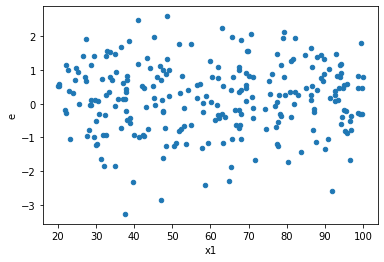

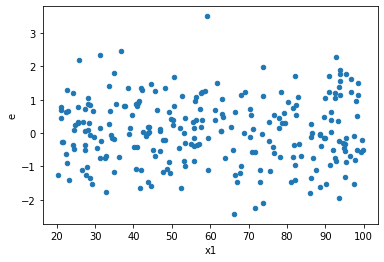

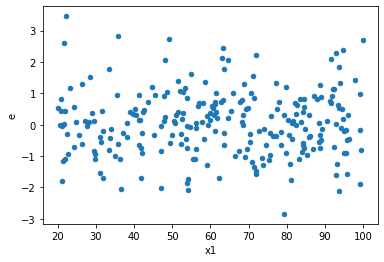

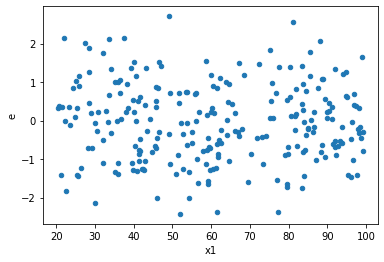

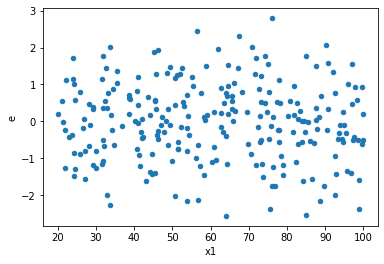

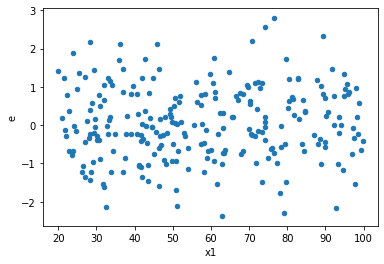

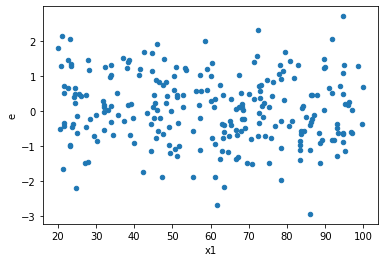

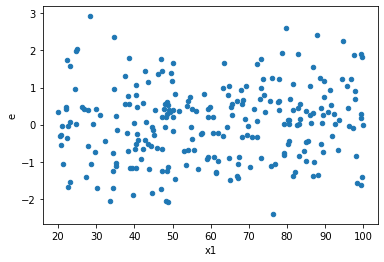

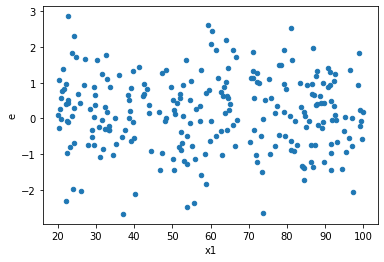

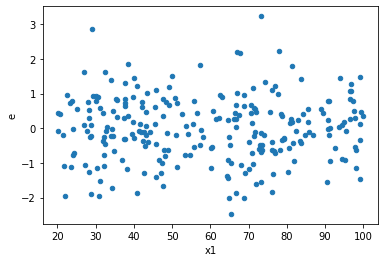

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,108.0,140.0,94.76723744482753,149.7107023721317,0.8774744207854401,1.0693621598009406,1.2186818606561078,0.27077413061946554,0.8646129346902672,0.13538706530973277,Reject001=1 : Homoscedasticity
8.0,126.0,122.0,128.25970477293234,133.89397243893563,1.0179341648645424,1.097491577368325,1.0781557543206828,0.6766885015870989,0.6616557492064505,0.33834425079354946,Reject001=1 : Homoscedasticity
12.0,119.0,129.0,127.57496787685585,139.41500040083022,1.072058553587024,1.0807364372157382,1.008094598564303,0.9623683658445614,0.5188158170777193,0.4811841829222807,Reject001=1 : Homoscedasticity
13.0,129.0,119.0,106.04400445150911,128.19003268083256,0.8220465461357296,1.0772271653851475,1.3104211318069143,0.13528270788888164,0.9323586460555592,0.06764135394444082,Reject001=1 : Homoscedasticity
14.0,113.0,135.0,115.80330773652665,150.71310031336628,1.0248080330666074,1.116393335654565,1.0893682520363352,0.6314997262078521,0.684250136896074,0.31574986310392605,Reject001=1 : Homoscedasticity
15.0,105.0,143.0,85.57327947117503,140.31218985078084,0.8149836140111907,0.9812041248306352,1.203955647649576,0.301798603835866,0.849100698082067,0.150899301917933,Reject001=1 : Homoscedasticity
21.0,125.0,123.0,113.21598225223221,117.15432892744704,0.9057278580178577,0.9524742189223336,1.0516119278993783,0.7801660968529673,0.6099169515735163,0.39008304842648367,Reject001=1 : Homoscedasticity
23.0,131.0,117.0,128.26222327554865,120.52360008098069,0.9791009410347226,1.0301162400083819,1.052104228313524,0.7808282616143856,0.6095858691928072,0.3904141308071928,Reject001=1 : Homoscedasticity
24.0,116.0,132.0,107.99973448170503,125.9113904210465,0.931032193807802,0.9538741698564129,1.0245340345914251,0.8899980754472865,0.5550009622763568,0.44499903772364324,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,120.0,128.0,139.39808106065203,118.90032699175944,1.1616506755054337,0.9289088046231206,0.7996455597281453,0.21608000660043755,Reject001=1 : Homoscedasticity
1.0,113.0,135.0,117.00922478863762,117.45296248900134,1.0354798653861736,0.8700219443629729,0.8402113584685738,0.33948730805712696,Reject001=1 : Homoscedasticity
2.0,125.0,123.0,139.37289094947948,122.73859938544003,1.114983127595836,0.9978747917515449,0.8949685130242249,0.5372415204321507,Reject001=1 : Homoscedasticity
3.0,108.0,140.0,94.76723744482753,149.7107023721317,0.8774744207854401,1.0693621598009406,1.2186818606561078,0.27077413061946554,Reject001=1 : Homoscedasticity
4.0,126.0,122.0,144.40362162009558,122.7773343867627,1.1460604890483777,1.0063715933341206,0.8781138543304581,0.4696145920062998,Reject001=1 : Homoscedasticity
5.0,114.0,134.0,110.60833910067923,111.70482254862117,0.9702485886024494,0.8336180787210535,0.859179893187787,0.40447910920013264,Reject001=1 : Homoscedasticity
6.0,135.0,113.0,131.04010513301193,102.42680239202707,0.9706674454297181,0.9064318795754608,0.9338233025567063,0.7005124511984399,Reject001=1 : Homoscedasticity
7.0,128.0,120.0,128.81417214795215,117.14606390285148,1.0063607199058762,0.976217199190429,0.9700470019157083,0.8643419512588345,Reject001=1 : Homoscedasticity
8.0,126.0,122.0,128.25970477293234,133.89397243893563,1.0179341648645424,1.097491577368325,1.0781557543206828,0.6766885015870989,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      993
Reject001=0 : Heteroscedasticity      7
Name: Result_test, dtype: int64